In [33]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

In [34]:
#@title Realizaremos la interpolación para 3 puntos definidos en un array, esto nos permite verificar el código y generalizar modificando el array
x_j = np.array([2, 5, 6])
y_j = np.array([4, 1, 2])

# Para realizar el código usaremos las siguientes definiciones:
Dado  $n+1$ puntos el polinomio interpolador en la forma de Lagrange es la combinación lineal de la forma

## $p(x) = \sum_{k = 0}^{n} f(x)_{k}L_{n, k}(x)$
donde
## $L_{n, k}(x) = \prod_{k = 0, i≠k}^{k} (x - x_{i})/(x_{k} - x_{i})$

In [35]:
#@title Luego calculamos el polinomio $L_{j}(x)$ para cada punto

x = sp.Symbol("x")

def polinomioLagrange(x, x_j, y_j):
  polinomio = 0
  for p in range(len(x_j)):
    L_x = 1
    for i in range(len(x_j)):
      if (i != p):
        L1 = (x - x_j[i])
        L2 = (x_j[p] - x_j[i])
        Lt = L1/L2
        L_x = L_x * Lt
    polinomio = polinomio + y_j[p]*L_x
  return polinomio

a = polinomioLagrange(x, x_j, y_j)
a

4*(3/2 - x/4)*(5/3 - x/3) + (6 - x)*(x/3 - 2/3) + 2*(x/4 - 1/2)*(x - 5)

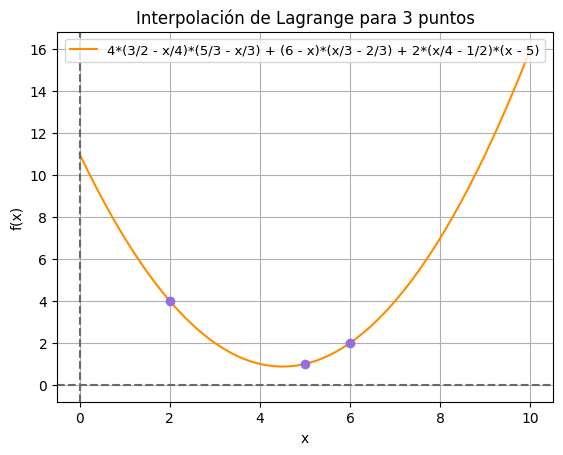

In [36]:
#@title Realizamos la gráfica para los puntos que elegimos
afuncion = sp.lambdify(x, a)
linspace = np.linspace(0, 10, 100)

plt.plot(linspace, afuncion(linspace), label = str(a), color = "darkorange")
plt.plot(x_j, y_j, "o", color = "mediumpurple")
plt.title("Interpolación de Lagrange para 3 puntos")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(loc = "upper center", fontsize = 9.5)
plt.grid()
plt.show()


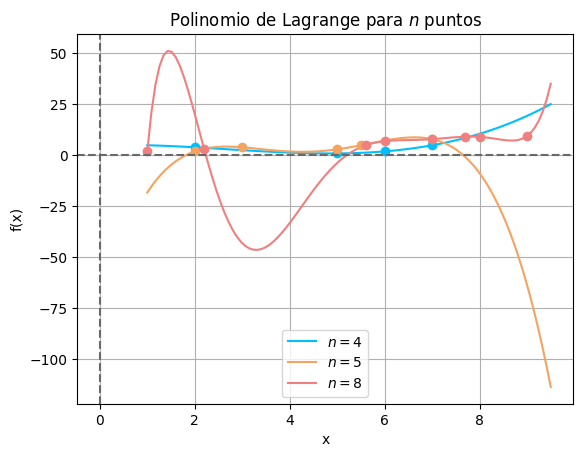

In [56]:
#@title Por último comparamos el polinomio para $n=4, n=6, n=8$ puntos

x1, x2, x3 = np.array([2, 5, 6, 7]), np.array([2, 3, 5, 5.5, 7]), np.array([1, 2.2, 5.6, 6, 7, 8, 7.7, 9])
y1, y2, y3 = np.array([4, 1, 2, 5]), np.array([2, 4, 3, 5, 8]), np.array([2, 3, 5 ,7, 8, 9.1, 9.2, 9.5])
xpuntos = np.linspace(1, 9.5, 100)
polinomio1, polinomio2, polinomio3 = sp.lambdify(x, polinomioLagrange(x, x1, y1)), sp.lambdify(x, polinomioLagrange(x, x2, y2)), sp.lambdify(x, polinomioLagrange(x, x3, y3))

plt.plot(xpuntos, polinomio1(xpuntos), color = "deepskyblue", label = "$n=$" + str(len(x1)))
plt.plot(xpuntos, polinomio2(xpuntos), color = "sandybrown", label = "$n=$" + str(len(x2)))
plt.plot(xpuntos, polinomio3(xpuntos), color = "lightcoral", label = "$n=$" + str(len(x3)))
plt.plot(x1, y1, "o", color = "deepskyblue")
plt.plot(x2, y2, "o", color = "sandybrown")
plt.plot(x3, y3, "o", color = "lightcoral")
plt.axvline(0, color = "dimgray", linestyle = "--")
plt.axhline(0, color = "dimgray", linestyle = "--")
plt.title("Polinomio de Lagrange para $n$ puntos")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend()
plt.grid()
plt.show()